1. Import Libraries

In [2]:
# Ensure pandas is installed
#%pip install pandas

import pandas as pd
import numpy as nm

# importing matplotlib and seaborn for visualization of results in form of confusion matrix

import matplotlib.pyplot as mtpl
import seaborn as sbn

# using sklearn libraries for spliting datset, converting it to TF-IDF (shows how important a word is in the document by giving a score to it higher the better)

# Ensure scikit-learn is installed
# %pip install scikit-learn

from sklearn.model_selection import train_test_split

#Evaluating matrixs for results

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score



2. Loading Dataset in the model and viewing the first couple of lines

In [3]:
dataset = pd.read_csv('../Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3. Cleaning the dataset and checking for basic info of the dataset

In [4]:
# Basic overview
print("Shape:", dataset.shape)

display(dataset.describe(include='all').T)  # summary stats for numeric and categorical used here to check for how many unique values in each column

# Check if any missing values
print("\nMissing values per column:")
display(dataset.isnull().sum().sort_values(ascending=False))

# Chrun customers distribution in percentage 
print("\nChurn distribution (%):")
display(dataset['Churn'].value_counts(normalize=True) * 100)


#Convert TotalCharges to numeric
if dataset['TotalCharges'].dtype == 'object':
    dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')




# Convert target to binary 0/1
dataset['Churn'] = dataset['Churn'].map({'Yes': 1, 'No': 0})


dataset.info()

Shape: (7043, 21)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing values per column:


customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64


Churn distribution (%):


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


4. Visualise the numeric columns on a graph to see for any outliars 

Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


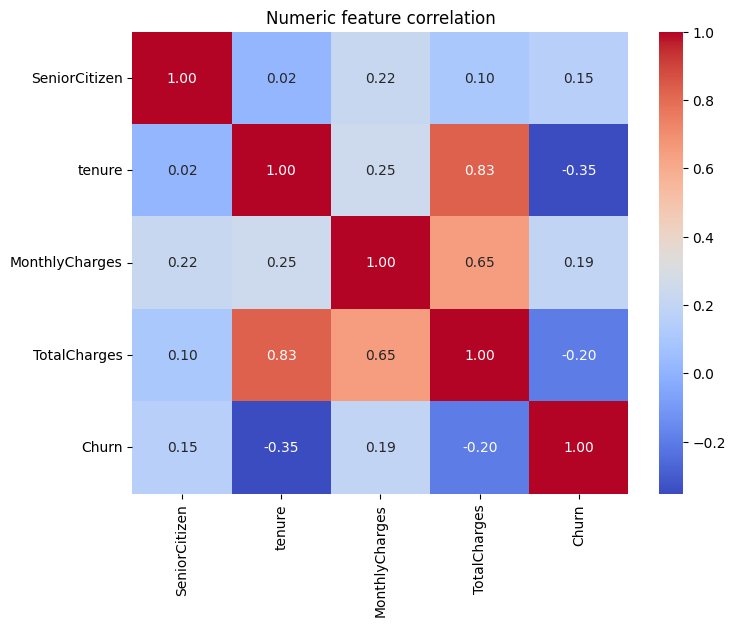

In [5]:
NumColums = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Columns:", NumColums)


# for example if we see that tenure is negatively correlated with churn it means that the longer a customer stays with the company the less likely they are to churn
# similarly if we see that monthly charges is positively correlated with churn it means that the higher the monthly charges the more likely a customer is to churn
# +1: perfect positive relationship (when one goes up, the other always goes up).
# -1: perfect negative relationship (when one goes up, the other always goes down).
# 0: no linear relationship.

mtpl.figure(figsize=(8,6))
sbn.heatmap(dataset[NumColums].corr(), annot=True, fmt=".2f", cmap="coolwarm")
mtpl.title("Numeric feature correlation")
mtpl.show()

5. Lets see the relation between customers who left with the non numeric data

Categorial Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Categorial Columns after removing customerID: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


gender
Male      3555
Female    3488
Name: count, dtype: int64

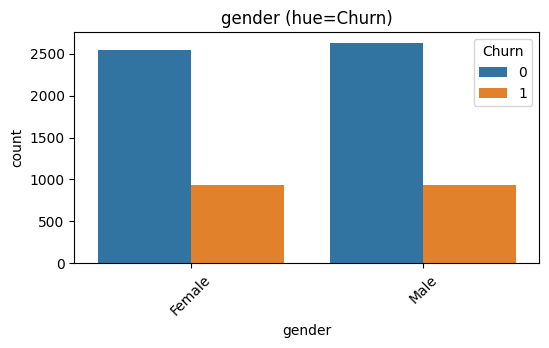

Partner
No     3641
Yes    3402
Name: count, dtype: int64

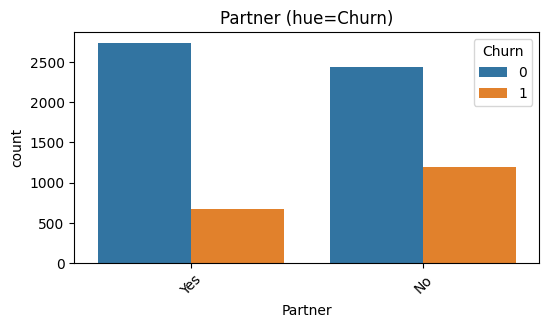

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

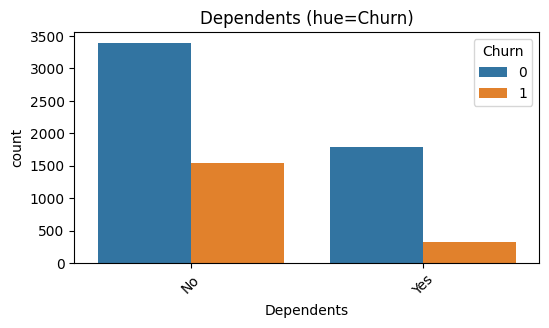

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

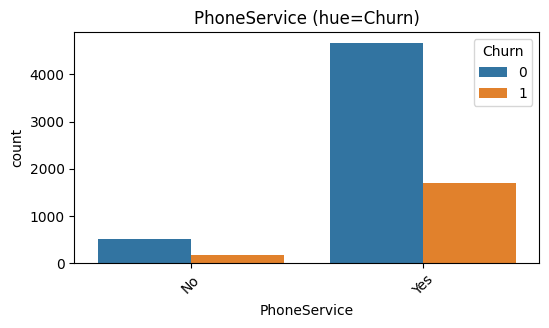

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

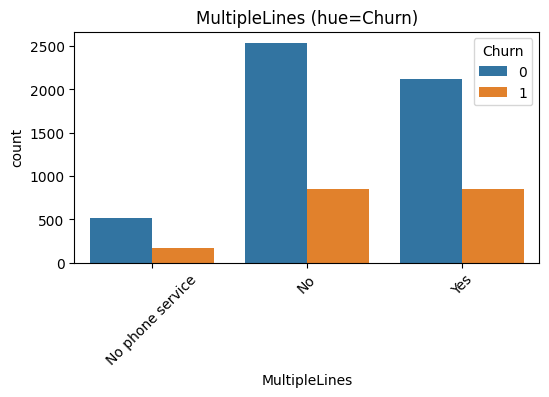

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

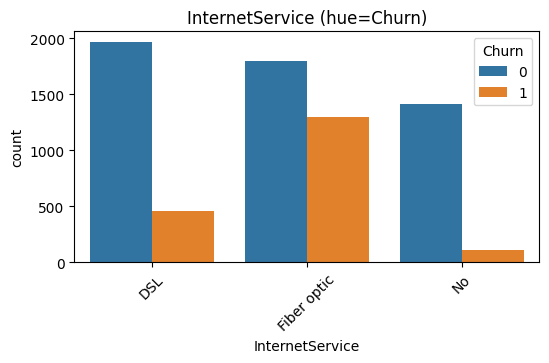

In [6]:
CategorialColumns = dataset.select_dtypes(include=['object']).columns.tolist()
print("Categorial Columns:", CategorialColumns)
CategorialColumns.remove('customerID')  # removing customerID as it is not a feature
CategorialColumns.remove('PaperlessBilling')  # removing PaperlessBilling as it is not a significant feature
print("Categorial Columns after removing customerID:", CategorialColumns)


for col in CategorialColumns[:6]:
    display(dataset[col].value_counts())
    mtpl.figure(figsize=(6,3))
    sbn.countplot(data=dataset, x=col, hue='Churn')
    mtpl.title(f"{col} (hue=Churn)")
    mtpl.xticks(rotation=45)
    mtpl.show()

6. Preprocessing Dataset (one-hot encode + train/test split)

In [13]:
# Using One Hot Encoding to convert the categorical data into binary

if 'customerID' in dataset.columns:
    dataset = dataset.drop('customerID', axis=1)  # dropping customerID as it is not a feature

# Droping Chrun column from CategorialColumns list as it is the target variable which will lead to dummy variable trap
X = dataset.drop('Churn', axis=1) 

X = pd.get_dummies(X, drop_first=True)  # drop_first=True to avoid dummy variable trap
y = dataset['Churn']

#splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

#after the one hot encoding we have 31 features in the dataset because some categorical columns had multiple unique values
# for example the column 'InternetService' had 3 unique values (DSL, Fiber optic, No) so it was converted into 2 binary columns (InternetService_Fiber optic, InternetService_No)


X_train shape: (5634, 30)
X_test shape: (1409, 30)


7. Traing the Random Forest Model

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



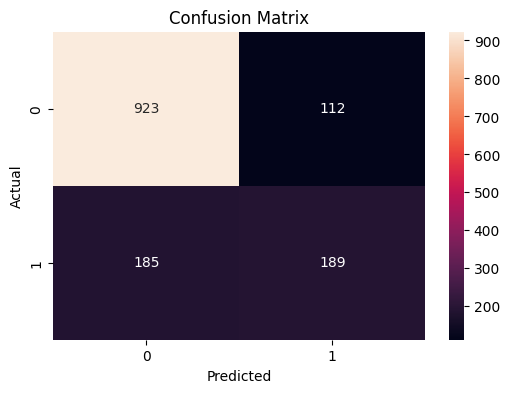

In [14]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # n_jobs=-1 to use all available cores
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test) 
print(classification_report(y_test, y_pred))

#Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
mtpl.figure(figsize=(6,4)) 
sbn.heatmap(cm, annot=True, fmt='d')
mtpl.title('Confusion Matrix')
mtpl.xlabel('Predicted')
mtpl.ylabel('Actual')
mtpl.show()


8. Saving the model for the deployment and later use

In [16]:
import os
import joblib

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)

os.makedirs("../models", exist_ok=True)
joblib.dump(rf, "../models/random_forest_churn.pkl")
joblib.dump(scaler, "../models/scaler.pkl")

['../models/scaler.pkl']